## Binary Classification Challenge
A chemist has two chemical flasks labelled 1 and 0 which contains two different chemicals.
He extracted 3 features from these chemicals in order to distinguish between them. You are
provided with the results derived by the chemist and your task is to create a model that will
label chemical 0 or 1 given its three features.


## Data Description
You are provided with two files test and train.                                                      
● Train: This files consists of two csv files Logistic X train and Logistic Y train. Xtrain
consists of the features whereas Ytrain consists of the labels associated with the
features.                                                                                            
● Test: This file consists of two files Logistic X test consisting of the features of test
data                                                                                                 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X_train = pd.read_csv('Logistic_X_Train.csv')
Y_train = pd.read_csv('Logistic_Y_Train.csv')
test = pd.read_csv('Logistic_X_Test.csv')

In [3]:
X_train

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603
...,...,...,...
2995,-0.455628,1.302303,-1.338027
2996,-0.434551,1.597813,-1.748643
2997,0.088277,1.638789,-2.193641
2998,1.525155,0.859234,1.505308


In [4]:
X_train.shape

(3000, 3)

In [5]:
Y_train

,label
0,1
1,1
2,1
3,0
4,0
...,...
2995,1
2996,1
2997,1
2998,0


In [6]:
x_train = X_train.values
x_train

array([[-1.23937466,  0.74910149, -0.52851491],
       [-1.03607028,  0.80143631, -1.28371152],
       [-0.61557914,  1.57952053, -1.39192706],
       ...,
       [ 0.08827657,  1.63878904, -2.19364056],
       [ 1.52515501,  0.85923429,  1.50530791],
       [-0.97981744,  0.56395376, -1.53939416]])

In [7]:
y_train = Y_train.values
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [8]:
x_train.shape

(3000, 3)

In [9]:
y_train.shape

(3000, 1)

In [10]:
class_0=X_train.loc[(Y_train['label']==0)]
class_1=X_train.loc[(Y_train['label']==1)]


In [11]:
class_0

,f1,f2,f3
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603
5,0.656532,0.991440,0.870280
6,1.453978,0.583741,1.277378
7,1.124756,1.116124,1.442579
...,...,...,...
2989,0.699160,0.694300,1.009333
2991,1.037060,0.399231,1.602371
2992,1.019020,1.297817,1.016635
2993,0.235431,0.125862,0.597009


In [14]:

from sklearn.linear_model import LogisticRegression

In [15]:
model=LogisticRegression()

In [17]:
model.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
coefficient=model.coef_

In [21]:
intercept=model.intercept_

In [22]:
print(intercept,'\n',coefficient)

[-4.27017148] 
 [[-3.92798396  3.10147056 -2.28040541]]


In [43]:
# accuracy is
model.score(X_train,Y_train)

0.9953333333333333

In [29]:
output=model.predict(test)

In [32]:
class_0_prediction=test.loc[(output==0)]
class_1_prediction=test.loc[(output==1)]

In [33]:
df=pd.DataFrame(output)
print(' classification of chemicals is:')
df

 classification of chemicals is:


,0
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


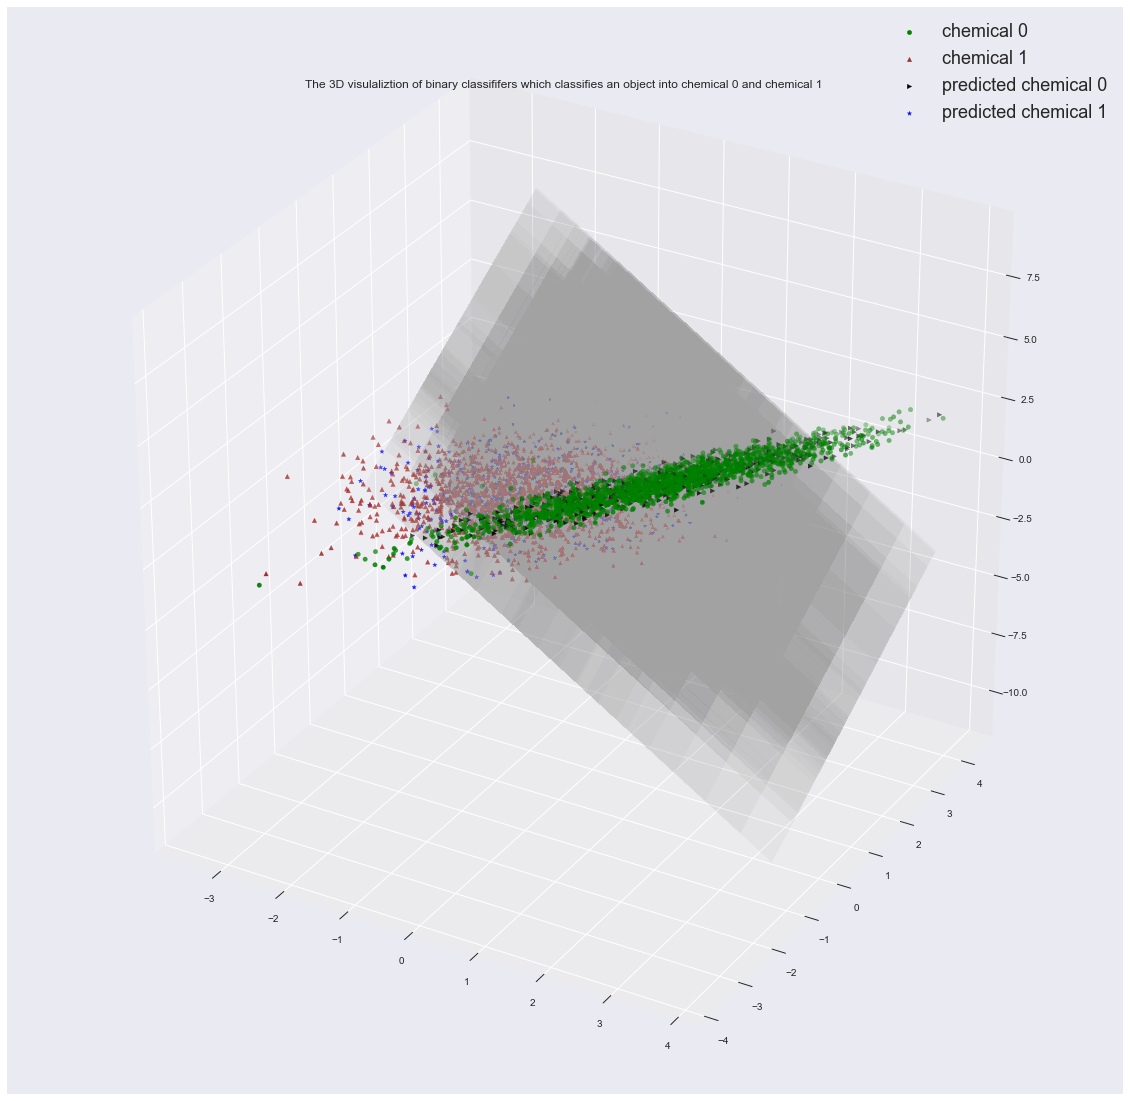

In [42]:
# visualizing it in 3D axis
fig = plt.figure(figsize=(20,20))

ax = plt.axes(projection='3d')

ax.scatter3D(class_0['f1'],class_0['f2'],class_0['f3'],label='chemical 0', color='Green')
ax.scatter3D(class_1['f1'],class_1['f2'],class_1['f3'],label='chemical 1', color='Brown', marker='^')

x = test['f1']
y = test['f2']

xx, yy = np.meshgrid(x, y)

z = -((coefficient[0][1]*yy + coefficient[0][0]*xx + intercept )/coefficient[0][2]) 

ax.plot_surface(xx,yy,z, alpha=0.02, color='w')
ax.scatter3D(class_0_prediction['f1'],class_0_prediction['f2'],class_0_prediction['f3'], label='predicted chemical 0', marker='>', color='black')
ax.scatter3D(class_1_prediction['f1'],class_1_prediction['f2'],class_1_prediction['f3'], label='predicted chemical 1', marker='*', color='blue')
ax.legend(fontsize=18)
plt.title('The 3D visulaliztion of binary classififers which classifies an object into chemical 0 and chemical 1 ')
plt.show()